In [32]:
%load_ext autoreload
%autoreload 2
import xarray as xr
from pathlib import Path
from hmpai.pytorch.models import *
from hmpai.training import split_data_on_participants
from hmpai.pytorch.training import train, validate, calculate_class_weights, train_and_test, k_fold_cross_validate, test
from hmpai.pytorch.utilities import DEVICE, set_global_seed, get_summary_str, save_model, load_model
from hmpai.pytorch.generators import SAT1Dataset
from hmpai.data import SAT1_STAGES_ACCURACY
from hmpai.visualization import plot_confusion_matrix
from hmpai.normalization import *
from torchinfo import summary
from hmpai.utilities import print_results, CHANNELS_2D, AR_SAT1_CHANNELS
from torch.utils.data import DataLoader
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from mne.preprocessing import ICA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
set_global_seed(42)
# data_path = Path("../data/sat1/split_stage_data_100hz.nc")
data_path = Path("../data/sat1/split_stage_data_100hz.nc")
# data_path = Path("../data/sat1/split_stage_data_unprocessed_500hz.nc")

dataset = xr.load_dataset(data_path)

In [3]:
shape_topological = False
train_data, val_data, test_data = split_data_on_participants(
    dataset, 60, norm_min1_to_1
)
train_dataset = SAT1Dataset(train_data, shape_topological=shape_topological)
val_dataset = SAT1Dataset(val_data, shape_topological=shape_topological)
test_dataset = SAT1Dataset(test_data, shape_topological=shape_topological)

In [36]:
ica = FastICA(n_components=30, random_state=42)

In [33]:
ica = ICA(n_components=30, random_state=42)

In [37]:
input_data = train_dataset.data.squeeze()

In [38]:
result = ica.fit_transform(input_data[0,:])

In [39]:
ica.get_params()

{'algorithm': 'parallel',
 'fun': 'logcosh',
 'fun_args': None,
 'max_iter': 200,
 'n_components': 30,
 'random_state': 42,
 'tol': 0.0001,
 'w_init': None,
 'whiten': 'unit-variance',
 'whiten_solver': 'svd'}

In [34]:
result = ica(input_data[0, :])

AttributeError: 'ICA' object has no attribute 'fit_transform'

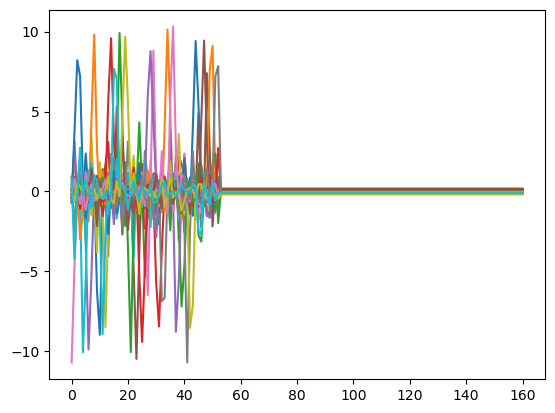